In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_fasta_to_dataframe(file_path):
    sequences = []

    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i % 2 == 1:  # Every second line contains the sequence
                sequences.append(line.strip())

    # Create a DataFrame from the list of sequences
    df = pd.DataFrame(sequences, columns=['Sequence'])

    return df

In [5]:
file_path = '../len_fil/Pel_fil_1.fasta'
df = read_fasta_to_dataframe(file_path)

In [6]:
GG_start = df[df['Sequence'].str.startswith('GG')]
GG_end = df[df['Sequence'].str.endswith('GG')]
GG_both = GG_start[GG_start['Sequence'].str.endswith('GG')]
GGG_start = df[df['Sequence'].str.startswith('GGG')]
GGG_end = df[df['Sequence'].str.endswith('GGG')]
GGG_both = GGG_start[GGG_start['Sequence'].str.endswith('GGG')]

In [7]:
def calculate_nucleotide_content(df):
    # Initialize a list to store the nucleotide content for each position
    nucleotide_content = []

    # Assuming all sequences are exactly 30 nt long
    seq_length = 30

    # Iterate over each position
    for pos in range(seq_length):
        count_A = count_G = count_C = count_T = 0

        # Count the occurrences of each nucleotide at the current position
        for seq in df['Sequence']:
            if seq[pos] == 'A':
                count_A += 1
            elif seq[pos] == 'G':
                count_G += 1
            elif seq[pos] == 'C':
                count_C += 1
            elif seq[pos] == 'T':
                count_T += 1

        # Total number of sequences (all sequences are assumed to be 30 nt long)
        total_count = len(df)

        # Calculate the fraction of each nucleotide at the current position
        nucleotide_content.append({
            'Position': pos + 1,
            'A': count_A / total_count,
            'G': count_G / total_count,
            'C': count_C / total_count,
            'T': count_T / total_count
        })

    # Create a DataFrame from the list of nucleotide content
    nucleotide_content_df = pd.DataFrame(nucleotide_content)

    return nucleotide_content_df

In [8]:
GG_start_dist = calculate_nucleotide_content(GG_start)
GG_end_dist = calculate_nucleotide_content(GG_end)
GG_both_dist = calculate_nucleotide_content(GG_both)
GGG_start_dist = calculate_nucleotide_content(GGG_start)
GGG_end_dist = calculate_nucleotide_content(GGG_end)
GGG_both_dist = calculate_nucleotide_content(GGG_both)

In [9]:
All_dist = calculate_nucleotide_content(df)

In [11]:
def calculate_differences(individual_df, all_df):
    diff_df = individual_df.copy()
    diff_df['A'] = individual_df['A'] - all_df['A']
    diff_df['G'] = individual_df['G'] - all_df['G']
    diff_df['C'] = individual_df['C'] - all_df['C']
    diff_df['T'] = individual_df['T'] - all_df['T']
    return diff_df

In [12]:
GG_start_diff = calculate_differences(GG_start_dist, All_dist)
GG_end_diff = calculate_differences(GG_end_dist, All_dist)
GG_both_diff = calculate_differences(GG_both_dist, All_dist)
GGG_start_diff = calculate_differences(GGG_start_dist, All_dist)
GGG_end_diff = calculate_differences(GGG_end_dist, All_dist)
GGG_both_diff = calculate_differences(GGG_both_dist, All_dist)

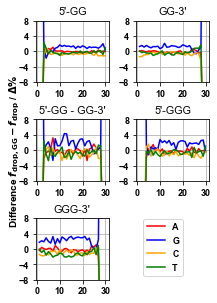

In [13]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 9
plt.rcParams['font.weight'] = 'bold'

def plot_difference(ax, df, title):
    ax.plot(df['Position'], df['A']*100, label='A', color='red')
    ax.plot(df['Position'], df['G']*100, label='G', color='blue')
    ax.plot(df['Position'], df['C']*100, label='C', color='orange')
    ax.plot(df['Position'], df['T']*100, label='T', color='green')
    ax.set_title(title)
    ax.set_ylim(-8, 8)
    ax.set_yticks([-8, -4, 0, 4, 8])
    ax.set_xticks([0, 10, 20, 30])
    ax.grid(True)

fig, axs = plt.subplots(3, 2, figsize=(3, 4.5))

# Plot the 5 graphs
plot_difference(axs[0, 0], GG_start_diff, '5\'-GG')
plot_difference(axs[0, 1], GG_end_diff, 'GG-3\'')
plot_difference(axs[1, 0], GG_both_diff, '5\'-GG - GG-3\'')
plot_difference(axs[1, 1], GGG_start_diff, '5\'-GGG')
plot_difference(axs[2, 0], GGG_end_diff, 'GGG-3\'')

# Remove the bottom right axis
axs[2, 1].axis('off')

# Add a legend in the empty bottom-right space
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(0.8, 0.2))

# Add common axis labels for the figure
#fig.text(0.5, 0.0001, 'Position', ha='center', va='center', weight="bold", fontsize=10)
fig.text(0, 0.5, r'Difference $f_{\mathrm{drop, GG}} - f_{\mathrm{drop}}$ / $\Delta\%$', 
         ha='center', va='center', rotation='vertical', weight="bold", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Save and display the figure
plt.savefig(fname="G_enrichment_difference_proposal_Paper.pdf", bbox_inches='tight', pad_inches=0.1)
plt.savefig(fname="Figure_S6.png", bbox_inches="tight", pad_inches=0.1)
plt.show()